In [1]:
# letterdata.csv
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [7]:
df = pd.read_csv('datasets/letterdata.csv')

In [8]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [9]:
df.shape

(20000, 17)

#  separate the input an doutput data

In [11]:
x =df.drop('letter', axis=1) 
y =df['letter']

<Axes: xlabel='count', ylabel='letter'>

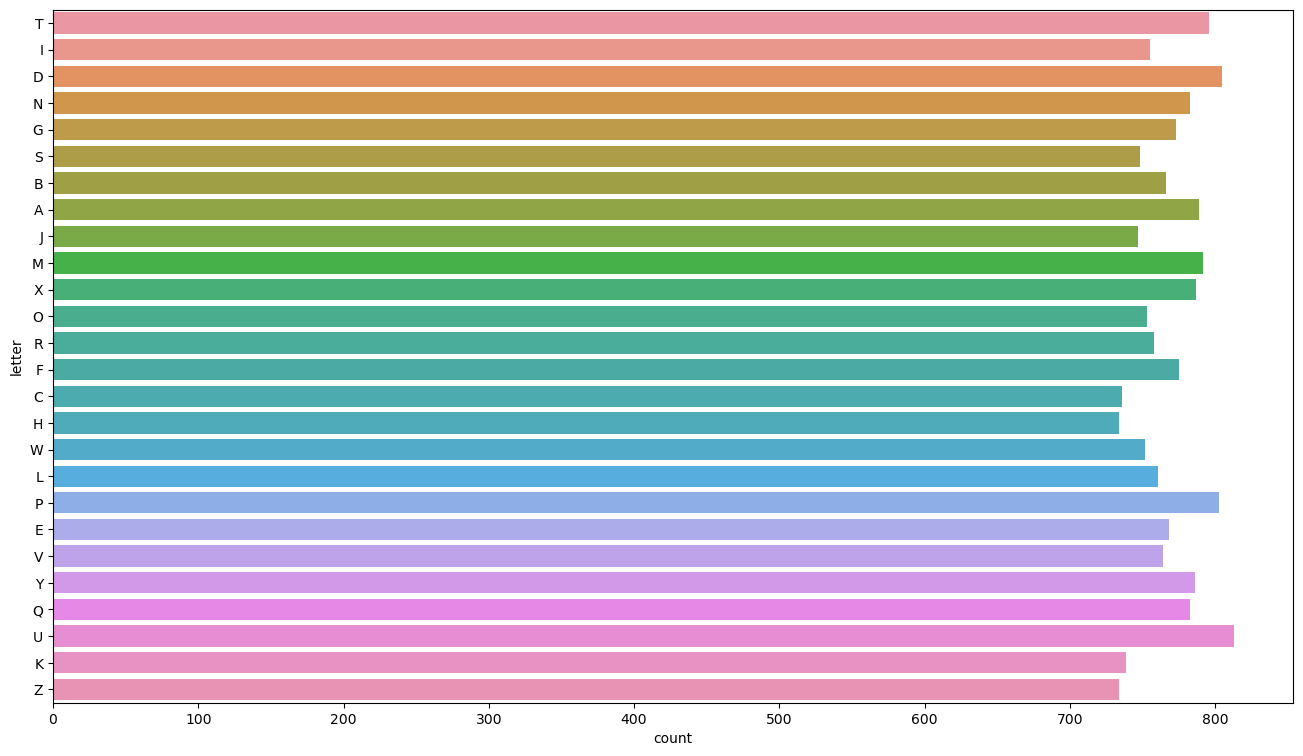

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(y = y )#, palette='tab10', hue=y)

In [16]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [18]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## Cross Validation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify= y, test_size=0.20)

In [21]:
x_train.shape

(16000, 16)

# Build the model

In [40]:
from sklearn.svm import SVC

In [81]:
svc = SVC(kernel='linear', random_state=0)
#svc = SVC(kernel='rbf', random_state=0)
#svc = SVC(kernel='poly', random_state=0)
#svc = SVC(kernel='sigmoid', random_state=0)

In [82]:
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

# Performance Evaluation

In [83]:
y_pred = svc.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [85]:
print(confusion_matrix(y_test, y_pred))

[[148   0   1   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   3   1]
 [  1 128   0   0   1   0   3   5   0   1   0   0   0   2   0   1   0   7
    3   0   0   1   0   0   0   0]
 [  0   0 128   0   6   0   3   0   0   0   6   0   1   0   1   0   0   0
    0   0   2   0   0   0   0   0]
 [  1   4   0 147   0   0   1   2   1   1   1   0   0   2   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   4   0 123   0   8   0   0   0   1   1   0   0   0   0   2   2
    3   4   0   0   0   2   0   1]
 [  0   3   0   0   1 139   0   0   0   1   1   0   0   2   0   2   0   0
    2   3   0   0   0   0   1   0]
 [  0   0   7   3   0   0 130   1   0   0   2   2   0   0   1   0   2   2
    5   0   0   0   0   0   0   0]
 [  0   3   1   9   0   2   0 104   0   0  10   0   0   1   5   1   3   5
    0   0   2   0   0   1   0   0]
 [  0   0   0   2   1   4   0   0 133   5   0   1   0   0   1   0   0   0
    2   0   0   0   0   2   0   0]
 [  3   0   0   0  

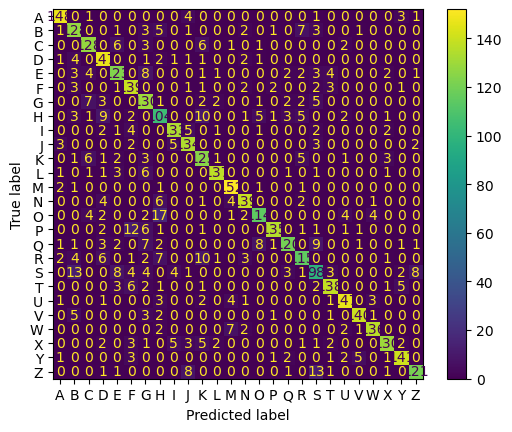

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.92      0.94      0.93       158
           B       0.77      0.84      0.80       153
           C       0.84      0.87      0.86       147
           D       0.80      0.91      0.85       161
           E       0.81      0.80      0.81       154
           F       0.79      0.90      0.84       155
           G       0.72      0.84      0.77       155
           H       0.68      0.71      0.69       147
           I       0.90      0.88      0.89       151
           J       0.85      0.90      0.87       149
           K       0.75      0.84      0.80       148
           L       0.94      0.90      0.92       152
           M       0.90      0.96      0.93       158
           N       0.90      0.89      0.89       157
           O       0.86      0.76      0.81       150
           P       0.95      0.84      0.89       161
           Q       0.90      0.76      0.82       157
           R       0.81    

In [88]:
accuracy_score(y_test, y_pred)

0.8505

In [89]:
#Accuracy of above 4 
#Linear: 0.8505
# rbf: 0.928
#poly:0.04
#sigmoid: 0.035

In [95]:
svc = SVC(kernel='poly', random_state=0)

In [108]:
new = x_test.iloc[[34, 675, 123, 2045, 332, 3567],:]

In [109]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6242,2,3,4,2,2,8,8,4,4,8,5,7,2,7,4,10
2211,2,7,4,5,3,12,3,2,2,9,2,9,3,7,3,9
14363,7,11,6,6,3,6,10,2,6,11,7,5,2,9,6,5
9494,2,9,3,7,1,15,2,6,5,14,1,9,0,7,0,8
6354,1,0,2,0,0,7,10,3,1,7,12,8,1,11,0,8
4121,2,1,2,1,1,5,11,7,1,9,6,4,1,9,3,8


In [113]:

svc.fit(x,y)

SVC(kernel='poly', random_state=0)

In [111]:
svc.predict(new)

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

In [112]:
y_test.iloc[[34, 675, 123, 2045, 332, 3567]].values

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

# dataset